In [1]:
# 볼린저 밴드 매매기법

# '상단 밴드에서 매도하고 하단 밴드에서 매수하라'는 볼린저 밴드에 관한 잘못된 통념이다, 
# 밴드 태그(주가가 밴드에 닿는 현상)가 일어났다고 해서 그 자체로 매수 신호나 매도 신호가 되는 것은 아니다.

# 앞에서 살펴본 %b는 볼린저 밴드 어디에 주가가 위치하는지를 나타내며 주가와 연계해 트레이딩 시스템을 구축할 
# 때 필요한 핵심 수단이다.밴드폭은 밴드의 너비를 수치로 나타낸 것으로 추세와 시작과 끝을 포착하는 역할을 한다
# 변동성과 추세는 볼린저 밴드를 구축할 때 이미 반영되었으므로 이 두 가지를 주가의 움직임을 확증하는 근거로
# 삼으면 안된다. 확증에 활용할 지표들은 범주별로 하나씩만 고르면 된다.

# 모멘텀 : 변화율, 스토캐스틱
# 추세 : 선형회귀, MACD
# 거래량 : 일중가도, 매집/분산, 현금흐름지표(MFI), 거래량가중MACD
# 과매수/과매도 : CCI, RSI
# 심리 : 여론조사선, 풋-콜 비율

# 존 볼린저는 '변동성 돌파', '추세 추종', '반전'이라는 세 가지 매매기법을 제시하면서, 독자가 
# 실제로 적용해보고 자신에게 제일 잘 맞는 기법을 사용하라고 말한다. 

# 변동성 돌파 매매기법은 주가가 상단 밴드를 상향 돌파할 때 매수하고 주가가 하단 밴드를 하향 이탈할 때 
# 공매도하는 기법인데, 현실적으로 우리나라에서 일반인은 공매도를 하기가 쉽지 않다. 그래서 이 책에서는 
# 추세 추종, 반전 두 매매기법을 파이썬으로 구현

In [2]:
# 볼린저 밴드를 이용한 추세 추종 매매기법

# 추세 추종은 상승 추세에 매수하고 하락 추세에 매도하는 기법이다. 상승 추세나 하락 추세의 시작을 단순히
# %b 지표만 이용해서 주가가 볼린저 상/하단 밴드에 태그했는지 여부로만 판단하지는 않는다. 
# 현금흐름지표나 일중강도 같은 거래량 관련 지표를 함께 이용해서 확증이 이루어진 경우에만 매수/매도에 들어간다.

In [3]:
# MFI 현금흐름지표

# 일반적으로 주가를 나타낼 때 종가를 사용하지만, 중심 가격을 사용하면 트레이딩이 집중적으로 발생하는 주가 
# 시점을 더 잘 나타낼 수 있다. 중심 가격이란 일정 기간의 고가, 저가, 종가를 합한 뒤에 3으로 나눈 값이다.

# 중심 가격에 거래량을 곱한 값이 바로 현금흐름이다. 다른 지표들이 보통 가격 한 가지만 분석하는 데 반해, 
# MFI는 가격과 거래량을 동시에 분석하므로 상대적으로 신뢰도가 더 높다고 볼 수 있다.

# 거래량 지표들은 일반적으로 주가에 선행한다는 특징이 있다. MFI는 거래량 데이터에 상대강도지소 개념을 도입한 
# 지표로 생각할 수 있다. RSI가 N일 동안 상승일 상승폭 합과 하락일 하락폭 합계를 이용하듯이, MFI도 이와 
# 유사하게 상승일 동안의 현금 흐름의 합(긍적적 현금흐름)과 하락일 동안의 현금 흐름의 합(부정적 현금 흐름)
# 을 이용한다.

In [4]:
import matplotlib.pyplot as plt
import Analyzer

In [6]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2021-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0

end_date is initialized to '2022-02-02'


In [7]:
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])
df = df[19:]

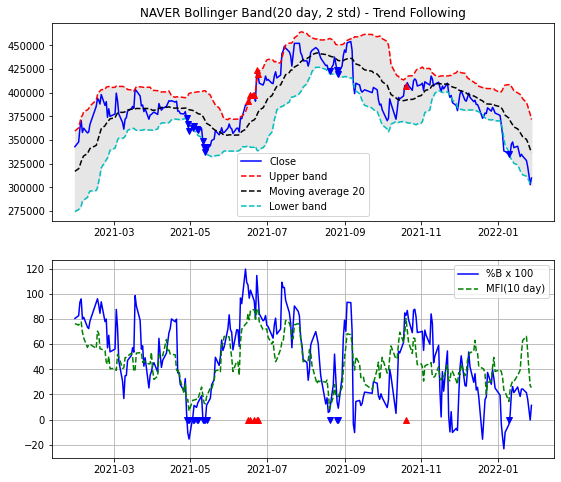

In [9]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();   

In [ ]:
# 위의 그림은 가격 기반의 볼린저 밴드와 거래량 기반의 MFI를 
# 함께 표시하고 있다, 이처럼 성질이 다른 지표를 함께
# 이용하면 하나의 지표만 사용할 때보다 신뢰성 있는 결과를 
# 얻을 수 있다. MFI는 0에서 100사이를 움직이는 한계 지표
# 로, MFI가 80을 상회하면 아주 강력한 매수신호를 나타내고 
# MFI가 20을 상회하면 아주 강력한 매도 신호